<a href="https://colab.research.google.com/github/thuan1109/Data-Analyst-Portfolio/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install pipreqs

In [ ]:
!pip freeze > requirements.txt



# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq') #vgg_transformer

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config['weights'] = '/content/weights/transformerocr.pth'
# config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [ ]:
detector = Predictor(config)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
18533it [00:14, 1278.72it/s]


'VŨ THUỲ NINH'

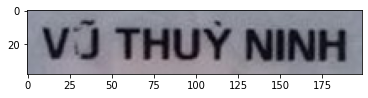

In [ ]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2022-12-07 14:28:11--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  12.9MB/s    in 5.6s    

2022-12-07 14:28:18 (10.5 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [ ]:
! unzip -qq -o ./data_line.zip

# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip
!unzip -u '/content/drive/MyDrive/Colab_Notebooks/OCR_Hackathon/data/new_train.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: new_train/train_img_95499.png  
  inflating: new_train/train_img_955.jpg  
  inflating: new_train/train_img_9550.jpg  
  inflating: new_train/train_img_95500.png  
  inflating: new_train/train_img_95501.png  
  inflating: new_train/train_img_95502.png  
  inflating: new_train/train_img_95503.png  
  inflating: new_train/train_img_95504.png  
  inflating: new_train/train_img_95505.png  
  inflating: new_train/train_img_95506.png  
  inflating: new_train/train_img_95507.png  
  inflating: new_train/train_img_95508.png  
  inflating: new_train/train_img_95509.png  
  inflating: new_train/train_img_9551.jpg  
  inflating: new_train/train_img_95510.png  
  inflating: new_train/train_img_95511.png  
  inflating: new_train/train_img_95512.png  
  inflating: new_train/train_img_95513.png  
  inflating: new_train/train_img_95514.png  
  inflating: new_train/train_img_95515.png  
  inflating: new_train/train_img_95516.png  
  

In [ ]:
import glob
import os
data_len = len(os.listdir(r"/content/new_train"))
data_len

103000

In [ ]:
import os
train_fol = '/content/train'
val_fol = '/content/val'
if not os.path.exists(train_fol):
  os.makedirs(train_fol)
if not os.path.exists(val_fol):
  os.makedirs(val_fol)



In [ ]:
split_fraction = 0.8
data_list =  glob.glob(r"/content/new_train/"+'*.*')
import random
random.seed(1601)
random.shuffle(data_list)
train_len = int(split_fraction*data_len)
train_len

82400

In [ ]:
train_list = data_list[:train_len]
val_list = data_list[train_len:]


In [ ]:
print(len(train_list))


82400


In [ ]:
print(*train_list[:5], sep='\n')

/content/new_train/train_img_87603.png
/content/new_train/train_img_39182.jpg
/content/new_train/train_img_63799.png
/content/new_train/train_img_1079.jpg
/content/new_train/train_img_9964.jpg


In [ ]:

import shutil
for file in train_list:
    train_destination = os.path.join(train_fol, os.path.basename(file))
    # print(train_destination )
    shutil.copy(file, train_destination)

for file in val_list:
    val_destination = os.path.join(val_fol, os.path.basename(file) )
    # print(val_destination)
    shutil.copy(file, val_destination)

In [ ]:
label_dict = {}
with open(r"/content/train_gt.txt") as f:
    lines = f.readlines()
for line in lines:
    # print(line.split())
#     print
    label_dict[line.split()[0]] = line.split()[1]

In [ ]:
list(label_dict.items())[:5]

[('train_img_0.jpg', 'Thỗn'),
 ('train_img_1.jpg', 'May-So'),
 ('train_img_2.jpg', 'nhẹn'),
 ('train_img_3.jpg', 'hàu'),
 ('train_img_4.jpg', 'Quấy')]

In [ ]:
if not os.path.exists("/content/label"):
  os.makedirs("/content/label")


In [ ]:
train_label_path = r"/content/label/train.txt"

with open(train_label_path, 'w') as f:

    for file in train_list:
        # print(label_dict[os.path.basename(file)])
        label = file+'\t'+label_dict[os.path.basename(file)]+'\n'
        # print(label)

        f.write(label)

val_label_path = r"/content/label/val.txt"

with open(val_label_path, 'w') as g:

    for file in val_list:
        # print(label_dict[os.path.basename(file)])
        label = file+'\t'+label_dict[os.path.basename(file)]+'\n'
        # print(label)

        g.write(label)



# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer') #vgg_transformer, vgg_seq2seq

In [ ]:

dataset_params = {
    'name':'hw',
    'data_root':'/content',
    'train_annotation':'/content/label/train.txt',
    'valid_annotation':'/content/label/val.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': '/content',
  'train_annotation': '/content/label/train.txt',
  'valid_annotation': '/content/label/val.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': Tru

You should train model from our pretrained

In [ ]:
from vietocr.loader.aug import ImgAugTransform
from imgaug import augmenters as iaa

class MyAugmentor(ImgAugTransform):
    def __init__(self):
        self.aug = iaa.GaussianBlur(sigma=(0, 1.0))

In [ ]:
# import shutil
# shutil.rmtree('/content/valid_hw')
# shutil.rmtree('/content/train_hw')

In [ ]:
trainer = Trainer(config, pretrained=False,augmentor=MyAugmentor())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:05<00:00, 108MB/s] 
Create train_hw: 100%|██████████████████████████████████████| 82400/82400 [01:13<00:00, 1115.79it/s]

Created dataset with 82399 samples



train_hw build cluster: 100%|█████████████████████████████| 82399/82399 [00:00<00:00, 156861.97it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Create valid_hw: 100%|██████████████████████████████████████| 20600/20600 [00:10<00:00, 1872.81it/s]

Created dataset with 20599 samples



valid_hw build cluster: 100%|█████████████████████████████| 20599/20599 [00:00<00:00, 142664.25it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


iter: 000200 - train loss: 2.467 - lr: 1.91e-05 - load time: 0.62 - gpu time: 30.39
iter: 000400 - train loss: 2.207 - lr: 3.95e-05 - load time: 0.43 - gpu time: 28.45
iter: 000600 - train loss: 1.949 - lr: 7.14e-05 - load time: 0.46 - gpu time: 28.50
iter: 000800 - train loss: 1.796 - lr: 1.12e-04 - load time: 0.42 - gpu time: 29.03
iter: 001000 - train loss: 1.666 - lr: 1.56e-04 - load time: 0.36 - gpu time: 28.58
iter: 001200 - train loss: 1.586 - lr: 2.01e-04 - load time: 0.41 - gpu time: 28.74
iter: 001400 - train loss: 1.515 - lr: 2.41e-04 - load time: 0.33 - gpu time: 28.23
iter: 001600 - train loss: 1.401 - lr: 2.73e-04 - load time: 0.37 - gpu time: 29.37
iter: 001800 - train loss: 1.352 - lr: 2.93e-04 - load time: 0.38 - gpu time: 28.52
iter: 002000 - train loss: 1.293 - lr: 3.00e-04 - load time: 0.29 - gpu time: 27.93
iter: 002200 - train loss: 1.212 - lr: 3.00e-04 - load time: 0.39 - gpu time: 27.62
iter: 002400 - train loss: 1.169 - lr: 3.00e-04 - load time: 0.33 - gpu time

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.8487776025236593, 0.9452992)

# Predict and compute CER

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.7 MB/s eta 0:00:00


In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.7 MB/s eta 0:00:00


In [ ]:
from evaluate import load
cer = load("cer")

In [ ]:
import os
import glob

import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer') #vgg_transformer, vgg_seq2seq
config['weights'] = r'/content/weights/transformerocr.pth'
# config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
detector = Predictor(config)

label_dict = {}
with open(r"/content/label/val.txt",encoding="utf8") as f:
    lines = f.readlines()
for line in lines:
    label_dict[line.split()[0]] = line.split()[1]

predictions = []
references = []
pred_dict = {}
for file in glob.glob(r"/content/val/"+"*.*"):
    img = Image.open(file)
    pred = detector.predict(img)
    predictions.append(pred)
    ref = label_dict[os.path.join('/content/new_train/', os.path.basename(file))]
    references.append(ref)
    if (pred!=ref): # lưu kqua đoán sai để xem
        pred_dict[os.path.basename(file)] = f'pred: {pred}, ref:{ref}'
# print(prerdictions, references)


from evaluate import load
cer = load("cer")
cer_score = cer.compute(predictions=predictions, references=references)
pred_dict['CER score'] = cer_score
# print(f'CER score is: {cer_score}')

import json
json_obj = json.dumps(pred_dict, indent = 3)

In [ ]:
!unzip -u '/content/drive/MyDrive/Colab_Notebooks/OCR_Hackathon/data/new_public_test.zip'

In [ ]:
list(label_dict.items())[:5]

[('/content/new_train/train_img_92645.png', 'Nghĩa'),
 ('/content/new_train/train_img_12701.jpg', 'Chẳng'),
 ('/content/new_train/train_img_81007.png', 'mưa'),
 ('/content/new_train/train_img_102120.jpg', 'RUMPET'),
 ('/content/new_train/train_img_21390.jpg', 'Rệ')]

In [ ]:
for file in glob.glob(r"/content/val/"+"*.*")[:5]:
  print(file)


/content/val/train_img_60707.png
/content/val/train_img_90698.png
/content/val/train_img_89331.png
/content/val/train_img_24425.jpg
/content/val/train_img_44058.jpg
